In [3]:
import pandas as pd
import datetime 
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)
from collections import Counter
import nltk # importing natural language tool
import scipy.stats as st
from matplotlib import rcParams
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
import string

In [2]:
#import and read the data set
df = pd.read_csv("./archive.csv")
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


<h1 style="color:green">Part I: Data Cleaning</h1>

<h1>Replacing Unwanted Characters in the Data Set</h1>

<body>By just looking at the head of the dataset above, it can noted that the <i>Motivation</i> column contains some double quotation marks which are not required. The quotation marks might make the analysis process of that column demanding</body>

In [3]:
#remove the double quotation marks from the column Motivation
df["Motivation"] = df["Motivation"].str.replace('"', '')

In [4]:
#observe the result
df

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"for his work on serum therapy, especially its ...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN
965,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the country'...,1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN
966,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN
967,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN


<h1>Checking missing Values</h1>
<body>In the below steps, the null values within the dataset are checked.</body>

Also the removal of all the punctuation in the <i>Motivation</i> column is needed, in order to observe solely the repeated words later on.

In [5]:
df['Motivation'] = df['Motivation'].str.replace(r'[^\w\s]+', '')

In [6]:
#display sum of missing values
df_nulls = df.isnull().sum()
df_nulls 

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

It seems like the<i> Birth City</i> is missing 28 values. Let's see which of the winners have those missing <i> Birth City</i> values

In [7]:
#copy the Full Name, Birth City, Birth Date, Laureate Type, Organization Country, Organization City, Organization Name, and Sex
newdf = df[['Full Name','Birth City','Birth Date', 'Laureate Type','Organization Country','Organization City','Organization Name','Sex']].copy()
newdf
#display the rows in which the Birth City is null
d1 = newdf[(newdf['Birth City'].isnull())]
d1

,Full Name,Birth City,Birth Date,Laureate Type,Organization Country,Organization City,Organization Name,Sex
24,Institut de droit international (Institute of ...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
61,Bureau international permanent de la Paix (Per...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
90,Comité international de la Croix Rouge (Intern...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
206,Office international Nansen pour les Réfugiés ...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
222,Comité international de la Croix Rouge (Intern...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
244,Friends Service Council (The Quakers),NaN,NaN,Organization,NaN,NaN,NaN,NaN
245,American Friends Service Committee (The Quakers),NaN,NaN,Organization,NaN,NaN,NaN,NaN
295,Office of the United Nations High Commissioner...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
365,Comité international de la Croix Rouge (Intern...,NaN,NaN,Organization,NaN,NaN,NaN,NaN
366,Ligue des Sociétés de la Croix-Rouge (League o...,NaN,NaN,Organization,NaN,NaN,NaN,NaN


<h1>Observation</h1>
<span>As you might have noticed most of the <i> Birth City</i> missing values are coming from <i>Laureate Type</i>: <i>Organization</i>. Not only is the <i> Birth City</i> missing, but also the <i> Birth Date</i>, <i>Sex</i>, <i> Organization Name</i>, <i> Organization City</i>, and <i> Organization Country</i>. This makes sense, as winning as an organization means that you are a group of people which might come from different univeristies (organization), birth cities, organization countries, cities, and are of differenet sexes. Besides, each of them might have a different birth date</span>
<br><br>
<span>Moreover, for the <i>Laureate Type</i>: <i>Organization</i>, the <i>Full Name</i> contains the name of the organization, not the name of the person. This is an indication that they are a group not an individual person who won the Nobel prize</span>

In [8]:
# Observe the number of existing Birth City when the laureate type is organization
organizationCount = newdf[(newdf['Laureate Type']=="Organization")].count() 

display(organizationCount)


Full Name               30
Birth City               4
Birth Date               4
Laureate Type           30
Organization Country     0
Organization City        0
Organization Name        0
Sex                      4
dtype: int64

Only 4 rows contain the <i>Birth City</i> when the <i>Laureate Type</i> is Organization

<h1>Further checks on the <i>Laureate Type: Organization </i></h1>
<span>What we want to observe is the number of <i>Laureate Type: Organization</i>, which are missing the following together:  <i>Birth City</i>, <i>Organization Name</i>, <i>Organization Country</i>, <i>Organization City</i>, <i>Birth Date</i>, and <i>Sex</i></span>

In [9]:
missingOrganization = newdf[(newdf['Laureate Type']=="Organization")&(newdf['Organization Name'].isnull())&(newdf['Organization City'].isnull())&(newdf['Organization Country'].isnull())&(newdf['Birth City'].isnull())&(newdf['Sex'].isnull())&(newdf['Birth Date'].isnull())].count()
missingOrganization



Full Name               26
Birth City               0
Birth Date               0
Laureate Type           26
Organization Country     0
Organization City        0
Organization Name        0
Sex                      0
dtype: int64

<h1> Analyzing the above result </h1>
The number of rows of <i>Laureate Type: Organization</i> which contain missing organization info, sex, birth date, and birth city are 26/30 rows. Likewise, only 4 rows contained birth city even without checking on the organization info (Organization name, city, and country). Now let's check the rows which contain the birth city and are of <i>Laureate Type: Organization</i>.

In [10]:
#checking the 4 rows which contain Birth Date, Birth City, Sex, and are of type Organization
laureate_org_expection = newdf[(newdf['Laureate Type'] == 'Organization') & (newdf['Sex'].notnull()) & (newdf['Birth Date'].notnull())& (newdf['Birth City'].notnull())]
laureate_org_expection



,Full Name,Birth City,Birth Date,Laureate Type,Organization Country,Organization City,Organization Name,Sex
452,Le Duc Tho,Nam Ha province,1911-10-14,Organization,NaN,NaN,NaN,Male
520,Mother Teresa,Uskup (Skopje),1910-08-26,Organization,NaN,NaN,NaN,Female
620,The 14th Dalai Lama (Tenzin Gyatso),Taktser,1935-07-06,Organization,NaN,NaN,NaN,Male
640,Aung San Suu Kyi,Rangoon (Yangon),1945-06-19,Organization,NaN,NaN,NaN,Female


<h1> Why do <i>Birth City</i>, <i>Birth Date</i>, and <i>Sex</i> exist above? </h1>
<span>It seems like not only the <i>Birth City</i>, <i>Birth Date</i>, and <i>Sex</i> exist, but also the <i>Full Name</i> column contains names of actual people and not a group, even though the <i>Laureate Type</i> is <i>Organization</i>. This might indicate that those people were part of an organization, or this data is mistakenly categorized as of <i>Laureate Type: Organization</i> </span>

<h1>Checking if we can drop rows of <span style ="font-style:italic">Laureate Type:</span> <span style ="font-style:italic">Organization</span> </h1>
<body>Let's check how many rows of <i>Laureate Type</i> <i>Organization</i> exist. If they are less or equal to 3% perecent of the data, we will choose to drop any row of type organization and focus our study on individuals.<br><br>
The reasons behind dropping the values are the missing data in records of <i>Laureate Type </i>: <i>Organization</i>. Besides, <i>Full Name</i> attribute for winners with a <i>Laureate Type</i> of <i>Organization</i> is an organization name (except for 4 records where the <i>Full Name</i> is the name of a person).<br><br> Therefore, due to all these inconsistencies and missing values. The observation was to be focused on <i>Laureate Type:</i>  <i>Individual</i> </body>
    

In [11]:
# How many total missing values do we have?
# shape returns the dimentionality of a dataframe (rows and columns)
# how many rows exist in the data set
dfNumofRows = df.shape[0]
# how many rows exist with type Organization
laureateOrganization_df = newdf[(newdf['Laureate Type']=="Organization")]
orgNumofRows= laureateOrganization_df.shape[0]
#calculate the perecentage of organization data with respect to the whole data set
perc_drop= (orgNumofRows/dfNumofRows)*100
perc_drop

3.0959752321981426

Since the perecentage of the rows to be dropped, rows which carry laureate type <span style ="font-style:italic">Organization</span> is approximately 3, we will choose to drop those rows.

In [12]:
#drop the rows of type organization
df = df[df['Laureate Type'] != "Organization"] 

In [13]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [14]:
# we can drop the Laureate Type column since it is the same for all rows (records).
df['Laureate Type'].nunique()

1

In [15]:
# dropping the Laureate Type column
df = df.drop(['Laureate Type'], axis=1)
df.head()



,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


<h1>Cleaning the <i>Birth Country</i> from parenthesis</h1> (get back)
<span> There are some values which have <i>old/previous Country name</i>(<i>New/current Country name</i>), so we kept only the new name, if the Birth country is already cleaned(no parenthesis) then keep it as it is</span>

In [16]:
clmn = list(df['Birth Country']) 
# print(clmn)
for i in range(0,len(clmn)):        
        s = clmn[i]
#         print(s)
        if(s.find(")") < 0):
            df['Birth Country'][i] = clmn[i]
        else:
            clmn[i] = s[s.find("(")+1:s.find(")")]
            df['Birth Country'][i] = clmn[i]
            
# df.head(5)

c:\users\eyad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\eyad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<h1>Check missing <span style="font-style:italic">Birth Dates</span></h1>
<body>Now that the data contains <i>Laureate Type: Individual</i> only, let's check how many of them is missing the <i>Birth Date</i>, given that we have dropped the <i>Laureate Type: Organization</i> which had missing the <i>Birth Date</i> columns null, as they were groups. The <i>Birth Date</i> is essential in order to calculate the winning age</body>

In [17]:
newdf = df.copy()
newdf[newdf["Birth Date"].isnull()]

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
853,2009,Chemistry,The Nobel Prize in Chemistry 2009,for studies of the structure and function of t...,1/3,841,Venkatraman Ramakrishnan,NaN,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN
894,2011,Physics,The Nobel Prize in Physics 2011,for the discovery of the accelerating expansio...,1/2,864,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN
895,2011,Physics,The Nobel Prize in Physics 2011,for the discovery of the accelerating expansio...,1/2,864,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,University of California,"Berkeley, CA",United States of America,NaN,NaN,NaN


Since there are three missing values, a research was made to try and find another data set which might carry the birth date of those 3 winners

<h1 style="color:green">Part II: Data Integration</h1>

<h1> Data Integration and Feature Engineering for <i>Birth Date</i></h1>
<body>Since there are three missing values, a research was made to try and find another data set which might carry the birth date of those 3 winners. Hence, the data can be merged or achieved from the below dataset. This dataset was reterived from: <a>https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/AGAFAQ</a> </body>

In [18]:
df_alternative = pd.read_csv("./laureate.csv")
df_alternative.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901.0,physics,NaN,1.0,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik Antoon,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902.0,physics,NaN,2.0,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Antoine Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903.0,physics,NaN,2.0,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903.0,physics,NaN,4.0,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


In [19]:
#checking the birthdates using the laureate id in the new data set
df_alternative[(df_alternative['id']==841)|(df_alternative['id']==864)]

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
862,841,Venkatraman,Ramakrishnan,0000-00-00,0000-00-00,India,IN,"Chidambaram, Tamil Nadu",NaN,NaN,NaN,male,2009.0,chemistry,NaN,3.0,"""for studies of the structure and function of ...",MRC Laboratory of Molecular Biology,Cambridge,United Kingdom
887,864,Saul,Perlmutter,0000-00-00,0000-00-00,USA,US,"Champaign-Urbana, IL",NaN,NaN,NaN,male,2011.0,physics,NaN,2.0,"""for the discovery of the accelerating expansi...",Lawrence Berkeley National Laboratory,"Berkeley, CA",USA
888,864,Saul,Perlmutter,0000-00-00,0000-00-00,USA,US,"Champaign-Urbana, IL",NaN,NaN,NaN,male,2011.0,physics,NaN,2.0,"""for the discovery of the accelerating expansi...",University of California,"Berkeley, CA",USA


<body> As shown above, the birth dates, found in column <i>born</i>, and death dates, <i>died</i>, are assigned to a default zeros format. Indicating that the values are also missing. Therefore, the winning age will be calculated for the rest of the rows which have valid values for the <i>Birth Date</i> column. Afterward, the winning age will be imputed for the 3 rows with missing <i>Birth Date</i> values.</body>

<h1>Impute Winning Age</h1>
<body>We find out that we have three missing values of the birth date and no missing values of the winning year, <span style="font-style:italic">Year</span> column, So we will create a new dataset with the <i>Birth Date</i> values without the nulls and compute the age of winning the prize. Next, we will impute the missing values after adding the <i>Winning_age</i> column to our orginal dataset </body>

In [20]:
#new data set called Birth_Date, where the Birth Date null records were dropped
Birth_Date = df[['Laureate ID','Year','Birth Date', 'Death Date']]
Birth_Date = Birth_Date.dropna(axis=0, subset=['Birth Date'])
# Birth_Date[Birth_Date["Death Date"].isnull()].sum()

<h1> Extract the Birth Year</h1>
Now we don't have any null values in the <span style="font-style:italic"> Birth Date</span> and the <span style="font-style:italic"> Year </span> column. 
Therefore, we only extract the year of birth from the <span style="font-style:italic">Birth Date</span> to be able to calculate the age of winning the nobel prize. Since, the<span style="font-style:italic"> Year</span> column has the winning year, rather than the date.

In [21]:
#The code below extracts the year from the date
Birth_Date["Birth Date"] = Birth_Date["Birth Date"].str.extract("(\d+)-", expand=False).astype(float)
Birth_Date.head(2)

,Laureate ID,Year,Birth Date,Death Date
0,160,1901,1852.0,1911-03-01
1,569,1901,1839.0,1907-09-07


<h1> Calculate the Winning Age</h1>
1- Calculate the winning age by subtracting the<span style="font-style:italic">Birth Date</span> column from the <span style="font-style:italic">Year</span> column. <br>
2- Create a column within the <span style="font-style:italic">Birth_Date</span> dataframe which will hold the calculated winning age. We will name that column <i>Winning_age</i>

In [22]:
winning_age = Birth_Date["Year"] - Birth_Date["Birth Date"]
Birth_Date['Winning_age'] = winning_age
Birth_Date.head(5)

,Laureate ID,Year,Birth Date,Death Date,Winning_age
0,160,1901,1852.0,1911-03-01,49.0
1,569,1901,1839.0,1907-09-07,62.0
2,293,1901,1854.0,1917-03-31,47.0
3,462,1901,1828.0,1910-10-30,73.0
4,463,1901,1822.0,1912-06-12,79.0


Now we have the winning age of all our dataset records which had non null<span style="font-style:italic"> Birth Date</span> and we will add this column to our dataframe

In [23]:
df=df.copy()
df["Winning_age"] = winning_age
#check the missing winning age as a result of the birth date null values
display(df[df["Winning_age"].isnull()])

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age
853,2009,Chemistry,The Nobel Prize in Chemistry 2009,for studies of the structure and function of t...,1/3,841,Venkatraman Ramakrishnan,NaN,"Chidambaram, Tamil Nadu",India,Male,MRC Laboratory of Molecular Biology,Cambridge,United Kingdom,NaN,NaN,NaN,NaN
894,2011,Physics,The Nobel Prize in Physics 2011,for the discovery of the accelerating expansio...,1/2,864,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,Lawrence Berkeley National Laboratory,"Berkeley, CA",United States of America,NaN,NaN,NaN,NaN
895,2011,Physics,The Nobel Prize in Physics 2011,for the discovery of the accelerating expansio...,1/2,864,Saul Perlmutter,NaN,"Champaign-Urbana, IL",United States of America,Male,University of California,"Berkeley, CA",United States of America,NaN,NaN,NaN,NaN


<h2> Check out the outliers </h2>
Since we still have three missing values of the age, we will impute using the mean but first let's check out the outliers

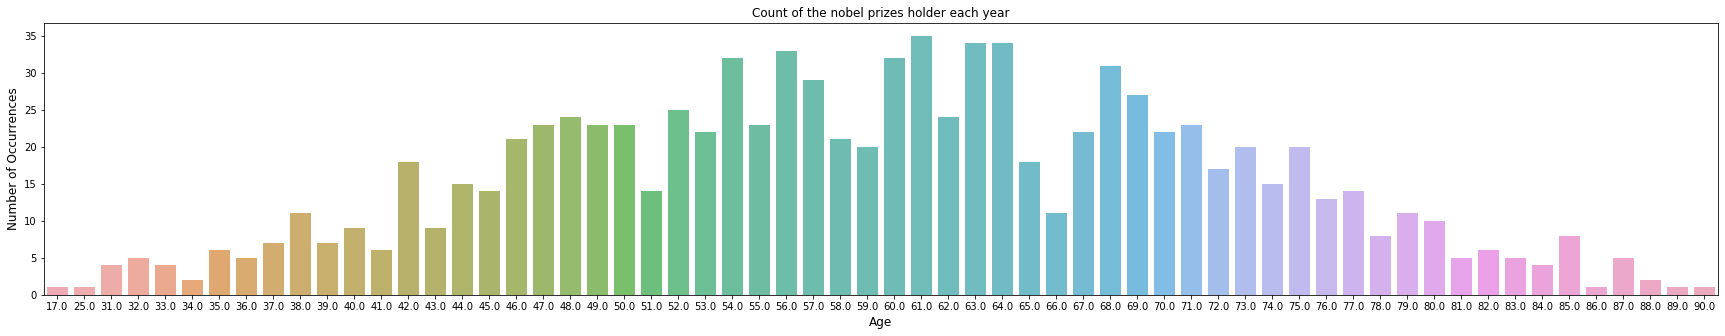

In [24]:
Winning_age_count  = df['Winning_age'].value_counts()
Winning_age_count = Winning_age_count[:100,]
plt.figure(figsize=(30,5))
sns.barplot(Winning_age_count.index, Winning_age_count.values, alpha=0.8)
plt.title('Count of the nobel prizes holder each year')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.show()

Since the <i>Winning_age</i> values are <b>not</b> normally distributed, and there are outliers, we can not impute the missing values using the mean. Therefore, we will impute using the median

<h1> Impute the Missing Winning Age </h1>
<body>Since we have three missing winning age as result of missing the <span style="font-style:italic"> Birth Date</span>, we will compute these values using the mean accorrding to the sex column.</body>

In [25]:
df=df.copy()
df["Winning_age"] = df.groupby("Sex")["Winning_age"].transform(lambda x: x.fillna(x.median()))

<h1>Imputing the missing values of the <i>Motivation</i> attribute</h1><br>
<body>There now exists 69 missing values in the <i>Motivation</i> column.<br><br> Therefore, we will try to find another dataset which contains those values. If that is the case, a merge between the two datasets is to be performed.</body>

In [26]:
df_motivation_nulls = df['Motivation'].isnull().sum()
df_motivation_nulls

69

<body>A dataset was found containing a <i>Motivation</i> attribute which could be used to fill in the missing values in the original dataset.</body>

In [27]:
# Reading the data from the dataset found, named 'nobel'
nobel_data = pd.read_csv("nobel.csv")
nobel_data.isnull().sum()

Year               0
Category           0
Name               0
Birthdate          0
Birth Place        5
County             0
Residence          4
Role/Affiliate    24
Field/Language     0
Prize Name         0
Motivation         0
dtype: int64

<body>No missing values for <i>Motivation</i> in the <i>nobel_data</i> dataset, so can be used to impute missing values of <i>Motivation</i> in our original dataset, to be able to use this attribute in our analysis.</body>

In [28]:
nullMotivation = df[df['Motivation'].isnull()]
nullMotivation

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,69.0
10,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,465,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland,59.0
16,1903,Peace,The Nobel Peace Prize 1903,NaN,1/1,466,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,1982,Peace,The Nobel Peace Prize 1982,NaN,1/2,543,Alva Myrdal,1902-01-31,Uppsala,Sweden,Female,NaN,NaN,NaN,1986-02-01,Stockholm,Sweden,80.0
554,1982,Peace,The Nobel Peace Prize 1982,NaN,1/2,544,Alfonso García Robles,1911-03-20,Zamora,Mexico,Male,NaN,NaN,NaN,1991-09-02,Mexico City,Mexico,71.0
560,1983,Peace,The Nobel Peace Prize 1983,NaN,1/1,545,Lech Walesa,1943-09-29,Popowo,Poland,Male,NaN,NaN,NaN,NaN,NaN,NaN,40.0
569,1984,Peace,The Nobel Peace Prize 1984,NaN,1/1,546,Desmond Mpilo Tutu,1931-10-07,Klerksdorp,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,53.0


In [29]:
# Filling the missing values for 'Motivation' by merging the dataset containing records with a null Motivation value 
# (nullMotivation), with the external dataset (nobel_data), using the winner's name for the merge
#get back
merged_df = pd.merge(nullMotivation, nobel_data, left_on="Full Name", right_on="Name", how='left').drop(['Year_y', 
'Category_y', 'Motivation_x', 'Name', 'Birthdate', 'Birth Place', 'County', 'Residence', 'Role/Affiliate', 'Field/Language', 
'Prize Name'], axis=1)

merged_df.rename(columns = {'Year_x':'Year', 'Category_x':'Category', 'Motivation_y':'Motivation'}, inplace = True)

merged_df

,Year,Category,Prize,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Motivation
0,1901,Peace,The Nobel Peace Prize 1901,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901 was awarded jointly...
1,1901,Peace,The Nobel Peace Prize 1901,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901 was awarded jointly...
2,1902,Peace,The Nobel Peace Prize 1902,1/2,464,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,69.0,NaN
3,1902,Peace,The Nobel Peace Prize 1902,1/2,465,Charles Albert Gobat,1843-05-21,Tramelan,Switzerland,Male,NaN,NaN,NaN,1914-03-16,Bern,Switzerland,59.0,The Nobel Peace Prize 1902 was awarded jointly...
4,1903,Peace,The Nobel Peace Prize 1903,1/1,466,William Randal Cremer,1828-03-18,Fareham,United Kingdom,Male,NaN,NaN,NaN,1908-07-22,London,United Kingdom,75.0,The Nobel Peace Prize 1903 was awarded to Rand...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,1982,Peace,The Nobel Peace Prize 1982,1/2,543,Alva Myrdal,1902-01-31,Uppsala,Sweden,Female,NaN,NaN,NaN,1986-02-01,Stockholm,Sweden,80.0,The Nobel Peace Prize 1982 was awarded jointly...
66,1982,Peace,The Nobel Peace Prize 1982,1/2,544,Alfonso García Robles,1911-03-20,Zamora,Mexico,Male,NaN,NaN,NaN,1991-09-02,Mexico City,Mexico,71.0,The Nobel Peace Prize 1982 was awarded jointly...
67,1983,Peace,The Nobel Peace Prize 1983,1/1,545,Lech Walesa,1943-09-29,Popowo,Poland,Male,NaN,NaN,NaN,NaN,NaN,NaN,40.0,The Nobel Peace Prize 1983 was awarded to Lech...
68,1984,Peace,The Nobel Peace Prize 1984,1/1,546,Desmond Mpilo Tutu,1931-10-07,Klerksdorp,South Africa,Male,NaN,NaN,NaN,NaN,NaN,NaN,53.0,The Nobel Peace Prize 1984 was awarded to Desm...


In [30]:
# Dropping the unneeded columns for a second merge with the original dataset
#get back
merged_df = merged_df.drop(['Year' , 'Category', 'Prize Share', 'Laureate ID', 'Birth Date', 'Birth City', 'Birth Country', 
                            'Sex', 'Organization Name', 'Organization City', 'Organization Country', 'Death Date', 
                            'Death City', 'Death Country', 'Winning_age'], axis=1)

merged_df

,Prize,Full Name,Motivation
0,The Nobel Peace Prize 1901,Jean Henry Dunant,The Nobel Peace Prize 1901 was awarded jointly...
1,The Nobel Peace Prize 1901,Frédéric Passy,The Nobel Peace Prize 1901 was awarded jointly...
2,The Nobel Peace Prize 1902,Élie Ducommun,NaN
3,The Nobel Peace Prize 1902,Charles Albert Gobat,The Nobel Peace Prize 1902 was awarded jointly...
4,The Nobel Peace Prize 1903,William Randal Cremer,The Nobel Peace Prize 1903 was awarded to Rand...
...,...,...,...
65,The Nobel Peace Prize 1982,Alva Myrdal,The Nobel Peace Prize 1982 was awarded jointly...
66,The Nobel Peace Prize 1982,Alfonso García Robles,The Nobel Peace Prize 1982 was awarded jointly...
67,The Nobel Peace Prize 1983,Lech Walesa,The Nobel Peace Prize 1983 was awarded to Lech...
68,The Nobel Peace Prize 1984,Desmond Mpilo Tutu,The Nobel Peace Prize 1984 was awarded to Desm...


In [31]:
# Merging the dataset containing the filled Motivation values from the external dataset (merged_df) with our original dataset
df = pd.merge(df, merged_df, on="Full Name", how='left')
df

,Year,Category,Prize_x,Motivation_x,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y,Motivation_y
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0,NaN,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0,NaN,NaN
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0,NaN,NaN
937,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the countrys...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN
938,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0,NaN,NaN
939,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0,NaN,NaN


In [32]:
df['Motivation_x'] = df['Motivation_x'].fillna(df['Motivation_y'])
df

,Year,Category,Prize_x,Motivation_x,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y,Motivation_y
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0,NaN,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0,NaN,NaN
3,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...
4,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0,NaN,NaN
937,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the countrys...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,NaN
938,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0,NaN,NaN
939,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0,NaN,NaN


In [33]:
df = df.drop(['Motivation_y'], axis=1)
df.rename(columns = {'Motivation_x':'Motivation'}, inplace = True)
df

,Year,Category,Prize_x,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0,NaN
3,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901
4,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
936,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0,NaN
937,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the countrys...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN
938,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0,NaN
939,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0,NaN


In [34]:
# Checking for missing values after performing the merge
df[df['Motivation'].isnull()].shape[0]

2

There are 21 missing values for <i>Motivation</i> after merging, meaning that records for these winners were not found in the external dataset used.<br><br>

To fill these missing values, a value of <i>'Not Specified'</i> could be used, since no values for the <i>Motivation</i> were found for these records.

In [35]:
df['Motivation'] = df['Motivation'].fillna('Not Specified')
df[df['Motivation'].isnull()].shape[0]

0

<body>There are no longer missing values in the <i>'Motivation'</i> column.</body>

<h1> Imputing the missing values of the <i>Organization Name</i> attribute </h1>

Even though we removed records where the <i>Laureate Type</i> is <i>Organization</i>, <i>Individuals</i> are still considered to have an Organization/Institute/University to which they belong, which is represented by the <i>Organization Name</i> column. However, we have missing values in that column.

In [36]:
df_nulls = df.isnull().sum()
df_nulls 

# There are 217 records with missing Organization Name

Year                      0
Category                  0
Prize_x                   0
Motivation                0
Prize Share               0
Laureate ID               0
Full Name                 0
Birth Date                3
Birth City                2
Birth Country             0
Sex                       0
Organization Name       217
Organization City       223
Organization Country    223
Death Date              324
Death City              342
Death Country           336
Winning_age               0
Prize_y                 869
dtype: int64

<body>The previous dataset, named <i>nobel_data</i> was found to also contain a <i>Role/Affiliate</i> attribute which can be used to fill in the missing values in our original dataset.</body>

In [37]:
nullOrganization = df[df['Organization Name'].isnull()]

In [38]:
# Filling the missing values for 'Organization Name' by merging the dataset containing records with a null Organization Name 
# value (nullOrganization), with the external dataset (nobel_data), using the winner's name for the merge

merged_df = pd.merge(nullOrganization, nobel_data, left_on="Full Name", right_on="Name", how='left').drop(['Year_y', 
'Category_y', 'Motivation_y',  'Name', 'Birthdate', 'Birth Place', 'County', 'Residence', 'Field/Language', 'Prize Name'], 
axis=1)

merged_df.rename(columns = {'Year_x':'Year', 'Category_x':'Category', 'Motivation_x':'Motivation'}, inplace = True)

merged_df

,Year,Category,Prize_x,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y,Role/Affiliate
0,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN,No Data
1,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901,Originator Geneva Convention (Convention de G...
2,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901,Founder and President of first French peace s...
3,1902,Literature,The Nobel Prize in Literature 1902,the greatest living master of the art of histo...,1/1,571,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Germany,Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany,85.0,NaN,No Data
4,1902,Peace,The Nobel Peace Prize 1902,Not Specified,1/2,464,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland,69.0,The Nobel Peace Prize 1902,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2014,Peace,The Nobel Peace Prize 2014,for their struggle against the suppression of ...,1/2,913,Kailash Satyarthi,1954-01-11,Vidisha,India,Male,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
214,2014,Peace,The Nobel Peace Prize 2014,for their struggle against the suppression of ...,1/2,914,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN
215,2015,Literature,The Nobel Prize in Literature 2015,for her polyphonic writings a monument to suff...,1/1,924,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,Female,NaN,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN
216,2016,Literature,The Nobel Prize in Literature 2016,for having created new poetic expressions with...,1/1,937,Bob Dylan,1941-05-24,"Duluth, MN",United States of America,Male,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN


In [39]:
# Dropping the unneeded columns for a second merge with the original dataset

merged_df = merged_df.drop(['Year', 'Category', 'Motivation', 'Prize Share', 'Laureate ID', 'Birth Date', 'Birth City', 
                            'Birth Country', 'Sex', 'Organization Name', 'Organization City', 'Organization Country', 
                            'Death Date', 'Death City', 'Death Country', 'Winning_age'], axis=1)

merged_df

,Prize_x,Full Name,Prize_y,Role/Affiliate
0,The Nobel Prize in Literature 1901,Sully Prudhomme,NaN,No Data
1,The Nobel Peace Prize 1901,Jean Henry Dunant,The Nobel Peace Prize 1901,Originator Geneva Convention (Convention de G...
2,The Nobel Peace Prize 1901,Frédéric Passy,The Nobel Peace Prize 1901,Founder and President of first French peace s...
3,The Nobel Prize in Literature 1902,Christian Matthias Theodor Mommsen,NaN,No Data
4,The Nobel Peace Prize 1902,Élie Ducommun,The Nobel Peace Prize 1902,NaN
...,...,...,...,...
213,The Nobel Peace Prize 2014,Kailash Satyarthi,NaN,NaN
214,The Nobel Peace Prize 2014,Malala Yousafzai,NaN,NaN
215,The Nobel Prize in Literature 2015,Svetlana Alexievich,NaN,NaN
216,The Nobel Prize in Literature 2016,Bob Dylan,NaN,NaN


In [40]:
# Merging the dataset containing the filled Organization Name values from the external dataset (merged_df) with our original 
# dataset
df = pd.merge(df, merged_df, on="Full Name", how='left')
df

,Year,Category,Prize_x_x,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,...,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y_x,Prize_x_y,Prize_y_y,Role/Affiliate
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,...,Berlin,Germany,1911-03-01,Berlin,Germany,49.0,NaN,NaN,NaN,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,...,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN,The Nobel Prize in Literature 1901,NaN,No Data
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,...,Marburg,Germany,1917-03-31,Marburg,Germany,47.0,NaN,NaN,NaN,NaN
3,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,...,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,Originator Geneva Convention (Convention de G...
4,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,...,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,Founder and President of first French peace s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,...,Tokyo,Japan,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN
939,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the countrys...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,...,NaN,NaN,NaN,NaN,NaN,65.0,NaN,The Nobel Peace Prize 2016,NaN,NaN
940,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,...,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN
941,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,...,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN


In [41]:
df['Organization Name'] = df['Organization Name'].fillna(df['Role/Affiliate'])
df

,Year,Category,Prize_x_x,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,...,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y_x,Prize_x_y,Prize_y_y,Role/Affiliate
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,...,Berlin,Germany,1911-03-01,Berlin,Germany,49.0,NaN,NaN,NaN,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,...,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN,The Nobel Prize in Literature 1901,NaN,No Data
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,...,Marburg,Germany,1917-03-31,Marburg,Germany,47.0,NaN,NaN,NaN,NaN
3,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,...,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,Originator Geneva Convention (Convention de G...
4,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,...,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,Founder and President of first French peace s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,...,Tokyo,Japan,NaN,NaN,NaN,71.0,NaN,NaN,NaN,NaN
939,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the countrys...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,...,NaN,NaN,NaN,NaN,NaN,65.0,NaN,The Nobel Peace Prize 2016,NaN,NaN
940,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,...,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0,NaN,NaN,NaN,NaN
941,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,...,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN


In [42]:
# Dropping the Role/Affiliate column as it is no longer needed
df = df.drop(['Role/Affiliate'], axis=1)
df

,Year,Category,Prize_x_x,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,...,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Winning_age,Prize_y_x,Prize_x_y,Prize_y_y
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,...,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0,NaN,NaN,NaN
1,1901,Literature,The Nobel Prize in Literature 1901,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,...,No Data,NaN,NaN,1907-09-07,Châtenay,France,62.0,NaN,The Nobel Prize in Literature 1901,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,for his work on serum therapy especially its a...,1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,...,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0,NaN,NaN,NaN
3,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,...,Originator Geneva Convention (Convention de G...,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901
4,1901,Peace,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,...,Founder and President of first French peace s...,NaN,NaN,1912-06-12,Paris,France,79.0,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901,The Nobel Peace Prize 1901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,...,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,71.0,NaN,NaN,NaN
939,2016,Peace,The Nobel Peace Prize 2016,for his resolute efforts to bring the countrys...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,NaN,The Nobel Peace Prize 2016,NaN
940,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,...,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,82.0,NaN,NaN,NaN
941,2016,Physics,The Nobel Prize in Physics 2016,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,...,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,65.0,NaN,NaN,NaN


In [43]:
# Checking for missing values after performing the merge
df_orgName_nulls = df[df['Organization Name'].isnull()].shape[0]
print(df_orgName_nulls)

23


It was also noticed that for some records, after merging, the <i>Organization Name</i> is not null yet contains the value <i>'No Data'</i>, which still needs to be replaced.

In [44]:
df_noData = df[df['Organization Name'] == 'No Data'].shape[0]
print(df_noData)

117


<h1>Data Cleaning after Integration </h1>
    <span>So, there are now a total of 162 missing values in <i>Organization Name</i> after we performed the merge (73 are null ( meaning they were not found in <i>nobel_dataset</i>), and 89 are stored in the <i>nobel_dataset</i> as <i>'No Data'</i>).<br><br>
We will therefore fill these remaining missing values with the value <i>'Self'</i>, which will be used to denote that this winner does not belong to an organization, since no value for the <i>Organization Name</i> for that winner was found. </span>

In [45]:
# Filling the null values first
df['Organization Name'] = df['Organization Name'].fillna('Self')

# There are no null values
df_orgName_nulls = df[df['Organization Name'].isnull()].shape[0]
print(df_orgName_nulls)

0


In [46]:
# Replacing the 'No Data' values with 'Self'
df.loc[df['Organization Name'] == 'No Data', ['Organization Name']] = 'Self'

# There are no 'No Data' values
df_noData = df[df['Organization Name'] == 'No Data'].shape[0]
print(df_noData)




0


<h1>Imputing the missing values in Organization Country</h1> (not understood get back)
<span> We couldn't find an external dataset with the missing values of <i>Organization Country</i>, nor can we just copy another column to fill it. First those missing in <i>Organiztion Country</i> that have their <i>Organzition Name</i> = equals to <i>Self</i>, are filled with the <i>Birth Country</i>. After that we are still missing 82 values in <i>Organization Country</i>, and since there is no external datasets to use we filled those missing values manually</span>

In [47]:
# #filling in missing values of Organization Country where Organization name == self, with the BirthCountry
# df['Organization Country'] = np.where(df['Organization Name'] == 'Self', df['Birth Country'],df['Organization Country'])
# df.head(3)
# d11 = (df[(df['Organization Country'].isnull())])
# d11.shape[0]# now we have 82 missing values in organization Country
# df.to_csv('out.csv')

<h1>Calling the new CSV file which has no missing values in <i>Organization Country</i></h1>
<span>Even after computing the missing values in the <i>Organization Country</i> there still have missing values and we dont have external datasets to fill them with nor can we just copy another column in it, so after a discussion we choose to fill them manualy through searching online for each value. After doing that we saved this modified data in a new csv file and then we called it again</span>

In [48]:

df = pd.read_csv("./out_modified.csv")
df.head(3)

#Checking if there are any missing values not delt with yet
dff11 = (df[(df['Organization Country'].isnull())])
dff11.shape[0]

# df.dtypes
#since we used google sheet to save the new csv file two columns were created as their index and so we will drop them
# df.head(3)
df = df.drop("Unnamed: 0", axis = 1)
df = df.drop("Unnamed: 0.1", axis = 1)
df.dtypes

Year                      int64
Category                 object
Motivation               object
Prize Share              object
Laureate ID               int64
Full Name                object
Birth Date               object
Birth City               object
Birth Country            object
Sex                      object
Organization Name        object
Organization Country     object
Death Date               object
Death City               object
Death Country            object
Winning_age             float64
dtype: object

<h1 style="color:green">PART III: Data Reduction </h1>


<h1>Dropping columns we are not going to use</h1>
<span> Since the <i>Organization City</i>, <i>Birth City</i>, <i>Death Date</i> are not needed in our explatory analysis, we will drop them. In addition, the <i>Birth Date</i> was used to calculate the <i>Winning_age</i>. However, it is not needed beyond that. Therefore, it will also be dropped. Finally, the <i>Prize</i> column holds information that's already present in two other columns (<i>Year</i> and <i>Category</i>). Therefore, since it's redundant, we decided to drop it as well.</span>

In [49]:
# df = df.drop("Organization City", axis=1)
# df = df.drop("Birth City", axis=1)
# df = df.drop("Death Date", axis=1)
# df = df.drop("Birth Date", axis=1)
# df = df.drop("Prize", axis=1) #(get back)
# df.head()
# #checking if it was dropoped
# df.dtypes


In [50]:

df

,Year,Category,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization Country,Death Date,Death City,Death Country,Winning_age
0,1901,Chemistry,in recognition of the extraordinary services h...,1/1,160,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,in special recognition of his poetic compositi...,1/1,569,Sully Prudhomme,1839-03-16,Paris,France,Male,Self,France,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,"for his work on serum therapy, especially its ...",1/1,293,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Poland,Male,Marburg University,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901 was awarded jointly...,1/2,462,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Originator Geneva Convention (Convention de G...,Switzerland,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901 was awarded jointly...,1/2,463,Frédéric Passy,1822-05-20,Paris,France,Male,Founder and President of first French peace so...,France,1912-06-12,Paris,France,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2016,Medicine,for his discoveries of mechanisms for autophagy,1/1,927,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Japan,NaN,NaN,NaN,71.0
936,2016,Peace,for his resolute efforts to bring the country'...,1/1,934,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,Self,Colombia,NaN,NaN,NaN,65.0
937,2016,Physics,for theoretical discoveries of topological pha...,1/2,928,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,United States of America,NaN,NaN,NaN,82.0
938,2016,Physics,for theoretical discoveries of topological pha...,1/4,929,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,United States of America,NaN,NaN,NaN,65.0


<h1>Handling Duplicates</h1>
We can now check for duplicate rows and drop them.

In [51]:
duplicateRowsDF = df[df.duplicated()] 
duplicateRowsDF 
print("The duplicated rows are of the following :", duplicateRowsDF['Full Name'], sep='\n')
df =df.drop_duplicates( subset=None, keep='first', inplace=False) #drop the duplicate values

The duplicated rows are of the following :
Series([], Name: Full Name, dtype: object)


In [52]:
duplicateRowsDF = df[df.duplicated()] 
print("The duplicated rows are of the following :", duplicateRowsDF['Full Name'], sep='\n')
duplicateRowsDF 

The duplicated rows are of the following :
Series([], Name: Full Name, dtype: object)


,Year,Category,Motivation,Prize Share,Laureate ID,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization Country,Death Date,Death City,Death Country,Winning_age


<h1 style="color:green">Part IV: Data Visualization</h1>

Let's first analyze the gender which wins more Nobel Prizez, and its percentage compared to the whole data set.

In [53]:
 df.groupby('Sex', as_index=False)['Sex'].agg({'Gender Count':'count'})

,Sex,Gender Count
0,Female,48
1,Male,892


As you might notice there is a notable difference between female and male winners.

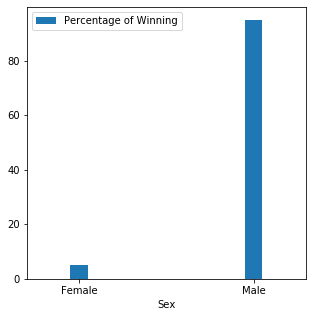

In [54]:
#create a dataframe for gender and count of each gender
gender_df= df.groupby('Sex', as_index=False)['Sex'].agg({'Gender Count':'count'})
x= gender_df[gender_df["Sex"]=="Male"] #dataset containig the male count
y=  gender_df[gender_df["Sex"]=="Female"]#dataset containing the female count
sum_gender = (x["Gender Count"]).sum() + (y["Gender Count"]).sum() #dataset containing the number of females and males
male_perc = ((x["Gender Count"]).sum()/sum_gender)*100 #percentage of male winners
female_perc = ((y["Gender Count"]).sum()/sum_gender)*100 #percentage of female winners
percentage = [female_perc,male_perc] 

gender_df['Percentage of Winning'] = percentage 
gender_df
#plot percetage of female winners and male winners

gender_df.plot.bar(rot=0, figsize=(5,5), width=0.1, x= "Sex", y="Percentage of Winning")

<h1> Which field do women/men excel in?</h1>


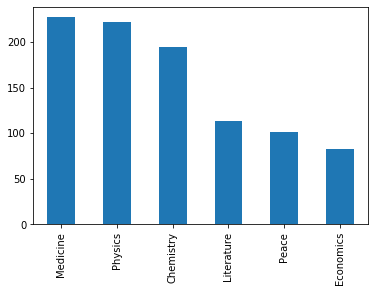

In [55]:
df['Category'].value_counts().plot.bar()

In the first graph we plot all the categories to check the most dominant one regardless of the gender. As shown, the most dominant <i>Category</i> is the <i>Medcine<i></i>

<h1> Females most category exceled in </h1>

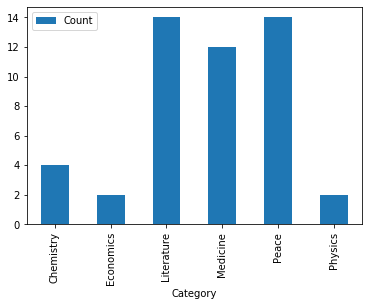

In [56]:
females = df[(df['Sex']=="Female")]
females = females[["Category"]]
col1 = females['Category']
females = females.groupby('Category').size() #get the count of females per year in the USA
females = pd.DataFrame(females)
newcolname2 = {'Count'}
females.columns = newcolname2 
females.plot.bar()

As shown above, the three notable categories women excel in the most are: <i>Literature</i>, <i>Medcine</i>, and <i>Peace</i>.

<h1> Males most category exceled in </h1>


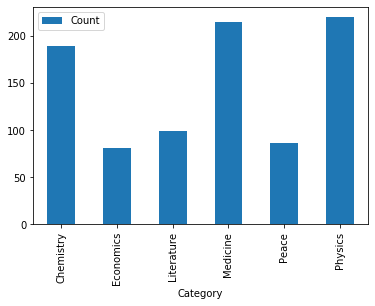

In [57]:
males = df[(df['Sex']=="Male")]
males = males[["Category"]]
col1 = males['Category']
males = males.groupby('Category').size() 
males = pd.DataFrame(males)
newcolname2 = {'Count'}
males.columns = newcolname2 
males.plot.bar()

As shown above, the three notable categories men excel in the most are: <i>Chemistry</i>, <i>Medicine</i>, and <i>Physics</i>.

<h1>Visualizing the most repeated word in the <i>Motivation</i> of the <i>Category</i> that interests women the most</h1>

In [58]:
females = df[(df['Sex']=="Female")]
top_female_Category= females[["Category"]].mode()
row1 = top_female_Category.iloc[0]
val = row1['Category']
#create a dataset where the category is chemistry
cdf2= df[df["Category"]==val]
# #find the most common 50 word
Counter(" ".join(cdf2["Motivation"]).split()).most_common(50)

[('of', 149),
 ('the', 138),
 ('and', 114),
 ('for', 85),
 ('his', 80),
 ('in', 75),
 ('a', 53),
 ('with', 49),
 ('which', 46),
 ('to', 27),
 ('has', 27),
 ('he', 17),
 ('human', 17),
 ('life', 16),
 ('poetic', 15),
 ('as', 15),
 ('an', 15),
 ('art', 14),
 ('by', 14),
 ('who', 13),
 ('her', 12),
 ('poetry', 12),
 ('great', 11),
 ('that', 11),
 ('recognition', 10),
 ('which,', 10),
 ('power', 9),
 ('narrative', 9),
 ('artistic', 8),
 ('epic', 8),
 ('new', 8),
 ('lyrical', 7),
 ('rich', 7),
 ('contemporary', 7),
 ('poetry,', 6),
 ('its', 6),
 ('spirit', 6),
 ('traditions', 6),
 ('drama', 6),
 ('force', 6),
 ('writings', 6),
 ('literature', 6),
 ('our', 6),
 ('inspired', 6),
 ('on', 6),
 ('writing', 6),
 ('-', 6),
 ('history', 5),
 ('deep', 5),
 ('works', 5)]

However, there are still some stop words that we would like to elimnate. Therefore, NLTK will be used along with regex expressions to remove stop words.

In [59]:
#Create a dataframe for chemistry category (Basma)
cdf2= df[df["Category"]==val]
#using NLTK to remove English stop words
stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
REGEX_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (cdf2.Motivation
           .str.lower()
           .replace([r'\|', REGEX_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate a DF to hold the count for each word
rslt = pd.DataFrame(Counter(words).most_common(20),
                    columns=['Word', 'Count']).set_index('Word')
rslt.plot.bar(rot=0, figsize=(30,5), width=0.8) #create a bar chart with the most repeated words

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Eyad/nltk_data'
    - 'c:\\users\\eyad\\appdata\\local\\programs\\python\\python36\\nltk_data'
    - 'c:\\users\\eyad\\appdata\\local\\programs\\python\\python36\\share\\nltk_data'
    - 'c:\\users\\eyad\\appdata\\local\\programs\\python\\python36\\lib\\nltk_data'
    - 'C:\\Users\\Eyad\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


<h1> Observing coorelation between <i>Sex</i> and <i>Organization Country</i> </h1>
    <body>A check, below, is made to observe the coorelation between the organization country and the sex. </body>

In [ ]:
contengency_table = pd.crosstab(df["Organization Country"],df["Sex"], margins= True)
contengency_table

In [ ]:
st.chi2_contingency(contengency_table)

Since the <i>p</i> value is much greater than 0.05, then no coorelation is observed. Therefore, we will try to observe the country which has the most female Nobel Prize winners

In [ ]:
df_female_institutes = df [df["Sex"]=="Female"]

In [ ]:
female_country = df_female_institutes["Organization Country"].mode()
print(female_country)

Seems like the USA has the most female Nobel prize winners. Let's see how did that change over the years.

In [ ]:
df_female_institutes_USA = df_female_institutes[df_female_institutes["Organization Country"] == "United States of America"]

In [ ]:
df_female_institutes_USA
CountStatus= df_female_institutes_USA["Year"].value_counts()
CountStatus

In [ ]:
df_female_institutes_USA_copy = df_female_institutes_USA.copy() #copy the dataframe which contains the female winners from the USA
col1 = df_female_institutes_USA_copy['Year'] #NAME THE FIRST COLUMN YEAR
df_female_institutes_USA_copy = df_female_institutes_USA_copy.groupby('Year').size() #get the count of females per year in the USA
df_female_institutes_USA_copy = pd.DataFrame(df_female_institutes_USA_copy)
newcolname2 = {'Count'} #name the second column count
df_female_institutes_USA_copy.columns = newcolname2 #add the second column to the dataframe
df_female_institutes_USA_copy.plot(linestyle='-',figsize=(5,1)) #plot the data frame using a line graph

The graph demonstrates that there is a sharp increase in the count of female winners at around 2004 inside the United States of America.

<h1>What are the chances of you winning a Nobel Prize?</h1>
<span> We first observe the unique values of <i> Birth Country</i>, then we see how many times each country had someone winning a nobel prize.  Finally, we calculate the percentage of every existing country winning a nobel prize. To elboarte, it is the percentage of the winners of a certain country with respect to the total number of winners. Accordingly, your chance to win a nobel prize will based on the winning percentage of that country.</span>

In [ ]:
#get unique values and name their column as Birth Country
threecopy = df.copy()
threecopy = threecopy['Birth Country'].unique() # getting unique values of Birth Country
threecopy = pd.DataFrame(threecopy)
newcolname = {'Birth Country'} #The name of the new column in the dataset threecopy
threecopy.columns = newcolname

#get the count of each of the Birth Country and name their column as count
fourcopy = df.copy()
col1 = fourcopy['Birth Country'].unique()
fourcopy = fourcopy.groupby('Birth Country').size() # their count for each 
fourcopy = pd.DataFrame(fourcopy)
newcolname2 = {'count'}
fourcopy.columns = newcolname2


#merging unique birth country with their count:

onemerge = pd.merge(threecopy, fourcopy, on='Birth Country', how='outer')
onemerge.head(3)

#get percent of each country to see the chances of winning a nobel prize according to the country
col3 = onemerge['count']
numberoftotal = col3.sum()
fivecopy = onemerge.copy()
fivecopy = fivecopy.assign(chancesTowin = (col3 / numberoftotal) * 100)
fivecopy.head(3)
# see if the sum of values in percent chancesTowin equals to 100%
fivecopy['chancesTowin'].sum()
fivecopy.head(10)


#Check the percentage for a certain country winning the nobel prize
Questionnine = fivecopy[(fivecopy['Birth Country'] == "Netherlands")]
Questionnine
print(Questionnine['chancesTowin'])

<h1>Lets Graph the percentage for each of the Birth Country </h1> <span> We are graphing the percentage to make it easier to visualize the chances of winning for each Country. In the begining there was one graph which had all the countries labeled in the X-axis beside each other but that made it hard to differentiate between each countries' to win, so we divided the graph into several graphs for the ease of the eyes.As you can see in the Y-axis the highest number was thirty, which means that the highest percentage we got was 30 % compared to other countries </span>

In [ ]:
graphdataframe = fivecopy.copy()



rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(100,100), dpi=600)

reso_names = graphdataframe['Birth Country']
reso_values = graphdataframe['chancesTowin']

N=15
sublists_names = [reso_names[x:x+N] for x in range(0, len(reso_names), N)]
sublists_values = [reso_values[x:x+N] for x in range(0, len(reso_values), N)]

size = int(len(reso_values))
fig, axs = plt.subplots(nrows=size//N+1, sharey=True, figsize=(50,190), dpi=50)

fig.suptitle('Winning Percentage / Country', 
          **{ 'size': 50, 'weight': 'bold'})

for ax, names, values in zip(axs, sublists_names, sublists_values):
    ax.bar(range(len(values)), values, align='center')
    ax.set_xlabel('Country', fontsize=50)
    ax.set_ylabel('Percentage of Winning', fontsize=50)
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim(0, len(names))
    ax.tick_params(axis='both', which='major', labelsize=50)
    #ax.set_xlim(0, N)

fig.subplots_adjust(bottom=0.05, top=0.95)
plt.show()


<h1>Which countries are interested in which field?</h1>
<span>We want to know what is the most sought after field for each Country</span>

In [2]:
oneone = df.copy()
twotwo = df.copy()
threethree = df.copy()



#original Dataset with only the organization country and category
cols4 = ['Category','Organization Country'] 
threethree = threethree[cols4]
threethree
originall =threethree.copy()
fourfour = threethree.copy()
five = threethree.copy()


#get unique values of organization and name their column as Organization Country
oneone = oneone['Organization Country'].unique() # getting unique values
oneone = pd.DataFrame(oneone)
oneone.columns = {"Organization Country"}
oneoneone = oneone.copy()
# print(oneoneone.count())# 65 unique countries
newcolname = {'Organization Country'}
oneone.columns = newcolname
# print(oneone)#29

#get unique values of organization and name their column as Organization Country
twotwo = twotwo['Category'].unique() # getting unique values
twotwo = pd.DataFrame(twotwo)
newcolname = {'Category'}
twotwo.columns = newcolname
# print(twotwo.count()) #6
# twotwo.head(10) #<Chemistry, Literature, Medicine, Peace , Physics, Economics>

#i first get the column of Organization country = germany
fourfour = fourfour[fourfour['Organization Country'] == 'Germany']
#then i get the count of each of the category 
fourfour = fourfour['Category'].value_counts()
#and get the maximum 
sum1 = fourfour.max()
fourfour = pd.DataFrame(fourfour)
fourfour

# newcolname = {'Sum'}
# fourfour.columns = newcolname
# fourfour = fourfour[fourfour['Sum']== sum1]
# fourfour.insert(1,"Country", "Germany")
# # threethree.index.name = 'Category'
# # print(fourfour)
# fourfour = pd.DataFrame(fourfour).reset_index()
# fourfour.columns = ['Category', 'Sum', 'Country']
# # fourfour.head(5)


# clmn = list(oneoneone['Organization Country']) 
# # print(clmn)

# for i in range(1,len(clmn)):        
#         s = clmn[i]
# #         print(s)
#         threethree = five.copy()
#         threethree = threethree[threethree['Organization Country'] == s]
#         threethree = threethree['Category'].value_counts()
#         sum1 = threethree.max()
#         threethree = pd.DataFrame(threethree)
#         newcolname = {'Sum'}
#         threethree.columns = newcolname
#         threethree = threethree[threethree['Sum']== sum1]
#         threethree.insert(1,"Country", s)
#         threethree = pd.DataFrame(threethree).reset_index()
#         threethree.columns = ['Category', 'Sum', 'Country']
#         threethree.head(5)
#         fourfour = pd.merge(threethree,fourfour, on=['Country', 'Category','Sum'], how='outer')
# fourfour.head(65)


NameError: name 'df' is not defined

In [75]:
##Ask the Question: which countries are interested in which field?
eleven = fourfour.copy()
print(eleven['Country'].shape[0]) #79
X = 'China'
eleven = eleven[eleven['Country'] == X]
eleven['Category']
# eleven.head(3)

79


11    Literature
Name: Category, dtype: object

<h1>Visualizaing the Output</h1>
<span> We choose to use Heat Map to be able to understand the relation between the countries and their best field of study</span>

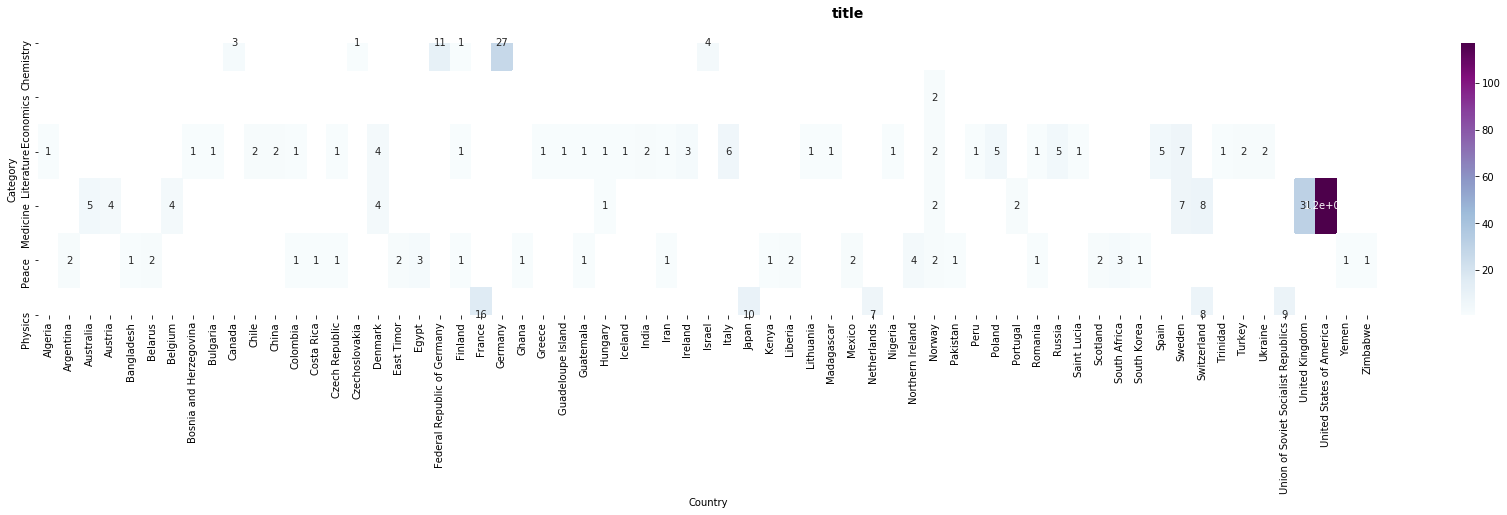

In [132]:
import matplotlib.pyplot as plt
# %matploylib inline

dataTograph = fourfour.copy()
dataTograph.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=(30,5))
# ax= sns.heatmap(pd.crosstab(dataTograph['Category'], dataTograph['Country']), cmap="BuPu")

plt.suptitle('title', fontsize=14, fontweight='bold')
dataTograph = dataTograph.pivot("Category","Country","Sum")
ax = sns.heatmap(dataTograph,annot=True, cmap="BuPu")


<h1> How old are you when you win a nobel prize? </h1>

In the next graph we will count the number of the nobel prizes gained every year, so we will be able to know how old you will be likely to win a nobel prize according this graph

In [ ]:
df.plot(kind='scatter',x='Year',y='Winning_age')
plt.show()

In [ ]:
df['Winning_age'].value_counts().plot(kind='barh', figsize=(10,10))


<h2>Graph of the Age and Gender togther </h2>
In the next graph we will check both the age and the sex togther to be able to know more accuarate how old you will be to win a nobel prize according to you gender 

In [ ]:
sns.relplot(x="Year", y="Winning_age", hue="Sex", data=df);

<h1>Which age ranges are interested in which fields?</h1>
<span>We want to know which field is mostly targeted by a specific age range</span>

<body>First, we need to add the ages in certain ranges in order to analyze for each age range.<br> But first, lets see the minimum
and the maximum age for nobel prize winners available in our data set:</body>



In [ ]:
minAge=df["Winning_age"].min()
maxAge=df["Winning_age"].max()
print("The smallest nobel prize winner's age is:  ", minAge)
print("The largest nobel prize winner's age is:   ", maxAge)

<body>Now lets define the age ranges we're gonna use, starting from the age of 17 to the age of 90</body>

In [ ]:
# ageRanges = [] 
# for age in df["Winning_age"]:
#     if age < 21:
#         ageRanges.append("17-20")
#     elif 21 <= age <= 30:
#         ageRanges.append("21-30")
#     elif 31 <= age <= 40:
#         ageRanges.append("31-40")
#     elif 41 <= age <= 50:
#         ageRanges.append("41-50")
#     elif 51 < age <= 60:
#         ageRanges.append("51-60")
#     elif 61 < age <= 70:
#         ageRanges.append("61-70")
#     elif 71 < age <= 80:
#         ageRanges.append("71-80")
#     elif 81 < age <= 90:
#         ageRanges.append("81-90")
    
    
# dfRanges = df["Category"]
# # dfRanges["Age_Ranges"] = ageRanges
# dfRanges

In [ ]:
df1 = df.copy()
# the intervals we are going to use:
ageRanges = pd.cut(df1.Winning_age, [16,20,30,40,50,60,70,80,90])
df1["age_range"] = ageRanges

df1[["Winning_age","age_range","Category"]]
del df1["Winning_age"]
df1=df1[["age_range","Category"]]
df1

In [ ]:
df2=df1.groupby(['age_range']).count()
df2

In [ ]:
df2.plot.bar()

In [ ]:
d1=df[["Winning_age","Category"]]
d1
d2=d1.groupby(['Winning_age']).count()
d2
# s=d1['Winning_age'].max()
# s